In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

# Support Vector Machines

## Maximal Margin Classifier

TBD - add all the derivation

$$\max_{\alpha_i} L_D = \sum_{i=1}^{N} {\alpha_i} - {{1}\over{2}} \sum_{i=1}^{N} {\sum_{j=1}^{N} {\alpha_i \alpha_j y_i y_j x^T_i x_j}}$$
subject to  $$\alpha_i \geq 0$$
$$\sum_{i=1}^{N} {\alpha_i y_i} = 0$$

In [2]:
get_labels = np.vectorize(lambda z: -1 if z < 0 else 1)
get_color = np.vectorize(lambda z: 'red' if z < 0 else 'blue')


def get_scores(X, W):
    """gets the raw scores of a linear classifier"""
    return np.dot(X, W[1:]) + W[0]


def get_int_slope_from_hyperplane(h):
    return -h[0] / h[2], -h[1] / h[2]


def plot_hyperplane(hyperplane, **kwargs):
    """plots a hyperplane in the current chart"""
    x = np.linspace(-10, 10, 100)
    b0, b1 = get_int_slope_from_hyperplane(hyperplane)
    y = b0 +  b1 * x

    plt.plot(x, y, **kwargs)


def plot_classifier(X, Y, est_hyperplane, real_hyperplane):
    plt.figure(figsize=(10, 10))

    plt.scatter(X[:,0], X[:,1], c=get_color(Y))
    
    plot_hyperplane(est_hyperplane, label='$\hat w$')
    
    plot_hyperplane(real_hyperplane, label='w', color='black')

    plt.xlim((-10, 10))
    plt.ylim((-10, 10))
    plt.legend()
    plt.show()

### Simulate Data

In [16]:
# simulate data points
n_points = 100

# real hyperplane
W = (1, 3, -1)

# features
X = np.random.randint(-10, 10, (n_points, 2))

# target
Y = get_labels(get_scores(X, W))

# starting point for variables
ALPHA = [1 for _ in range(len(X))]

### Create Objective Function

In [17]:
def get_objective(X, Y):
    def objective(a):
        nonlocal X
        nonlocal Y
        sum_alpha = sum(a)
        Ni = range(len(X))
        Nj = range(len(X))
        big_sum = sum([a[i] * a[j] * Y[i] * Y[j] * np.dot(np.transpose(X[i]), X[j]) for i in Ni for j in Nj])
        return - (sum_alpha - (1 / 2) * big_sum)
    
    return objective


def get_constraint(Y):
    def constraint(a):
        nonlocal Y
        return sum(a[i] * Y[i] for i in range(len(Y)))
    return constraint


constraints = {
    'type': 'eq',
    'fun': get_constraint(Y)
}

bounds = [(0, np.inf) for _ in range(len(ALPHA))]

### Optimize

In [26]:
opt = minimize(get_objective(X, Y),
               ALPHA,
               bounds=bounds,
               constraints=constraints)
opt

     fun: -19.999999590789713
     jac: array([34.9939537 , 71.00135422, 32.99054337, 38.99536896,  7.00551987,
       29.00529099, 48.99623871, 32.99860764, 16.99560165, 10.99618149,
       12.99687576,  3.00401688,  9.00624466,  0.99803543, 19.00173187,
       26.99378204, 10.99077225, 40.99071503,  7.00289154,  5.00751877,
       30.99250793, 52.99499512, 40.99337387, 15.00032043, 22.9977417 ,
       28.99184418, 15.00569534,  5.00748825, 20.9997673 , 44.98941422,
       46.99554443, 23.00587082, 65.00193405, -3.00341034, 36.99737024,
       48.99624872, 18.9990449 , 54.9956727 , 28.99183369, 63.00124025,
       19.00171471, 16.99026251, 32.99863911, 20.9970603 ,  6.9947691 ,
       44.99750996, 32.99057198, 42.99142361, 23.00044966, 36.99197292,
       23.00044966, 15.00567675, -0.99193287, 10.99887848, 55.00106955,
       44.98944664, 48.99354839, 44.99750996, 40.99607849, 26.99378729,
       15.00567675, 44.99480963, 27.00458574, 25.0011692 , 34.99935484,
       24.99846888, 45.0

In [27]:
# get beta
idx = [idx for idx, val in enumerate(opt.x) if val >.001][1]
opt.x[idx]

beta = sum([opt.x[i] * Y[i] * X[i] for i in range(len(X))])
beta

# get beta_0
beta0 = 1 / Y[idx] - np.dot(np.transpose(X[idx]), beta)
beta0

W_hat = (beta0, beta[0], beta[1])

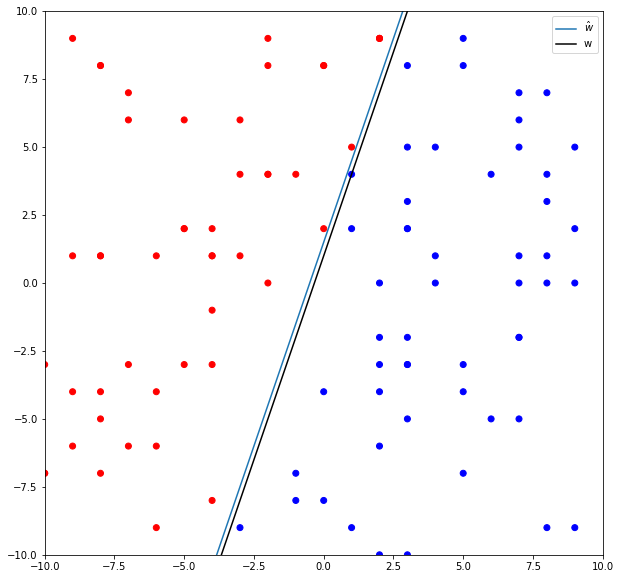

In [28]:
plot_classifier(X, Y, W_hat, W)

## Suppor Vector Classifiers

In [ ]:
def hinge_loss(X, Y, W):
    """get the hinge loss for the given set of points, labels and W"""
    return np.sum(np.maximum(np.zeros(X.shape[0]), 1 - get_scores(X, W) * Y))


def get_func_to_optimize(X, Y):
    """returns the function to be optimized given the data"""
    
    def f(W):
        nonlocal X
        nonlocal Y
        return hinge_loss(X, Y, W)
    
    return f

## Support Vector Machines

## SVMs with More than Two Classes
### One-Versus-One Classification
### One-Versus-All Classification

## Relationship to Logistic Regression

# Exercises

This problem involves hyperplanes in two dimensions.
- (a) Sketch the hyperplane $1 + 3X_1 − X_2 = 0$. Indicate the set of points for which $1 + 3X_1 − X_2 > 0$, as well as the set of points for which $1 + 3X_1 − X_2 < 0$.

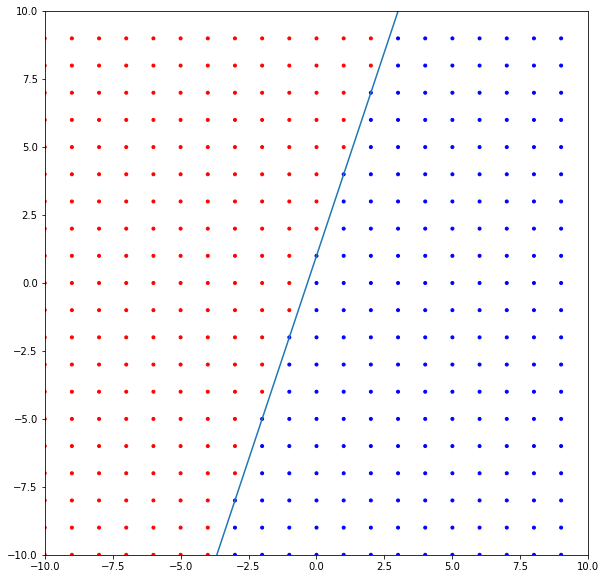

In [45]:
hyperplane = np.vectorize(lambda x: 1 + 3*x)
get_color = np.vectorize(lambda z: 'red' if z < 0 else 'blue')

x = np.linspace(-10, 10, 100)
y = hyperplane(x)

plt.figure(figsize=(10, 10))
plt.plot(x, y)

x0 = np.repeat(np.arange(-10, 10), 20).reshape((20, 20)).T
y0 = np.repeat(np.arange(-10, 10), 20).reshape((20, 20))

plt.scatter(x0, y0, marker='.', c=get_color(hyperplane(x0) - y0).reshape(-1))
plt.gca().set_aspect('equal', 'box')
plt.xlim((-10, 10))
plt.ylim((-10, 10))
plt.show()

- (b) On the same plot, sketch the hyperplane $−2 + X1 + 2X2 = 0$. Indicate the set of points for which $−2+ X1 +2X2 > 0$, as well as the set of points for which $−2+ X1 + 2X2 < 0$.